<a href="https://colab.research.google.com/github/ENRIQUEAHERNANDEZ/TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
# Importamos la biblioteca pandas, que nos ayuda a manejar datos en forma de tablas (como Excel)
import pandas as pd

# Leemos el archivo JSON. Este tipo de archivo tiene estructura en niveles (anidado), como una caja con subcajas.
df_clientes = pd.read_json("/TelecomX_Data.json")

# Mostramos las primeras filas de la tabla para ver cómo están organizados los datos
df_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [2]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
df_clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [4]:
# Ver cuántos valores nulos hay por columna
df_clientes.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [5]:
# 1. Convertimos las columnas anidadas en columnas normales (expandimos en horizontal)
df_aplanado = pd.concat([
    df_clientes[["customerID", "Churn"]],
    df_clientes["customer"].apply(pd.Series),
    df_clientes["phone"].apply(pd.Series),
    df_clientes["internet"].apply(pd.Series),
    df_clientes["account"].apply(pd.Series)
], axis=1)

# 2. Expandimos también los datos de 'Charges' que están dentro de 'account'
df_aplanado = pd.concat([
    df_aplanado.drop(columns=["Charges"]),
    df_aplanado["Charges"].apply(pd.Series).rename(columns={"Monthly": "Charges.Monthly", "Total": "Charges.Total"})
], axis=1)

# 3. Visualizamos las primeras filas para verificar el resultado
df_aplanado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df_aplanado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
df_aplanado.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [8]:
# Ver si hay filas duplicadas
df_aplanado.duplicated().sum()

np.int64(0)

In [9]:
# Ejemplo: ver todas las categorías distintas en la columna "Churn"
pd.unique(df_clientes["Churn"])

array(['No', 'Yes', ''], dtype=object)

In [10]:
# 1. Verificar valores nulos por columna
print(" Valores nulos por columna:")
print(df_aplanado.isnull().sum())
print("\n")

# 2. Verificar si hay filas duplicadas
duplicados = df_aplanado.duplicated().sum()
print(f"📎 Filas duplicadas: {duplicados}\n")

# 3. Revisar tipos de datos para detectar errores de formato
print(" Tipos de datos:")
print(df_aplanado.dtypes)
print("\n")

# 4. Revisar valores únicos por columna categórica para detectar inconsistencias
columnas_categoricas = df_aplanado.select_dtypes(include='object').columns

print(" Valores únicos por columna categórica:")
for col in columnas_categoricas:
    print(f"\n {col}:")
    print(df_aplanado[col].unique())

 Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


📎 Filas duplicadas: 0

 Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contrac

In [11]:
# Copiamos el DataFrame para no modificar el original
df_limpio = df_aplanado.copy()

# 1. Convertimos Charges.Total a numérico (puede estar como texto por errores en el JSON)
df_limpio["Charges.Total"] = pd.to_numeric(df_limpio["Charges.Total"], errors="coerce")

# 2. Eliminamos duplicados (si existieran)
df_limpio.drop_duplicates(inplace=True)

# 3. Corregimos valores vacíos o faltantes en la columna "Churn"
# Por ahora, eliminaremos filas sin valor en "Churn", ya que es la variable objetivo
df_limpio = df_limpio[df_limpio["Churn"].isin(["Yes", "No"])]

# 4. Verificamos y convertimos columnas categóricas a formato uniforme (minúsculas, sin espacios)
columnas_categoricas = df_limpio.select_dtypes(include="object").columns

for col in columnas_categoricas:
    df_limpio[col] = df_limpio[col].str.strip().str.lower()

# 5. Revisamos nuevamente valores nulos
print(" Valores nulos después de limpieza:")
print(df_limpio.isnull().sum())


 Valores nulos después de limpieza:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


/tmp/ipython-input-11-1600960217.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[col] = df_limpio[col].str.strip().str.lower()


In [12]:
# Creamos la columna 'Cuentas_Diarias' dividiendo el gasto mensual entre 30
df_limpio["cuentas_diarias"] = df_limpio["Charges.Monthly"] / 30

# Mostramos las primeras filas para verificar
df_limpio[["Charges.Monthly", "cuentas_diarias"]].head()

,Charges.Monthly,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [34]:
df_limpio.rename(columns={
    "Churn": "abandono",
    "SeniorCitizen": "adulto_mayor",
    "Partner": "tiene_pareja",
    "Dependents": "tiene_dependientes",
    "PhoneService": "servicio_telefonico",
    "MultipleLines": "lineas_multiples",
    "InternetService": "tipo_internet",
    "OnlineSecurity": "seguridad_en_linea",
    "OnlineBackup": "respaldo_en_linea",
    "DeviceProtection": "proteccion_dispositivo",
    "TechSupport": "soporte_tecnico",
    "StreamingTV": "tv_en_streaming",
    "StreamingMovies": "peliculas_en_streaming",
    "Contract": "tipo_contrato",
    "PaperlessBilling": "factura_digital",
    "PaymentMethod": "forma_pago"
}, inplace=True)

In [35]:
print(df_limpio.columns.tolist())

['customerID', 'abandono', 'genero', 'adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'meses_contratado', 'servicio_telefonico', 'lineas_multiples', 'tipo_internet', 'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico', 'tv_en_streaming', 'peliculas_en_streaming', 'tipo_contrato', 'factura_digital', 'forma_pago', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']


#📊 Carga y análisis

Análisis Descriptivo

In [36]:
# Análisis estadístico general de las columnas numéricas
df_limpio.describe()

,adulto_mayor,meses_contratado,cargos_mensuales,cargos_totales,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


Distribución de evasión

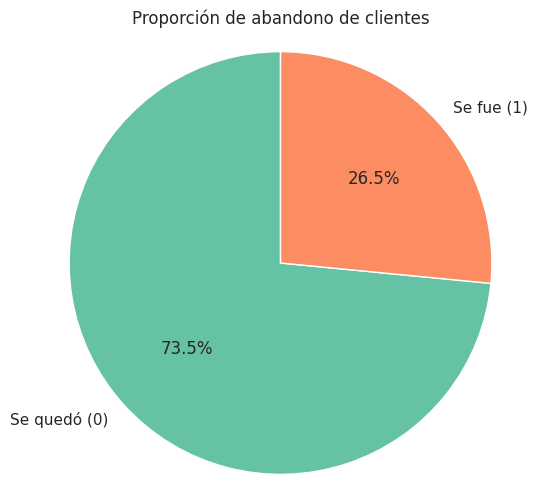

In [37]:
# Conteo total por categoría
valores = df_limpio["abandono"].value_counts()
etiquetas = ["Se quedó (0)", "Se fue (1)"]

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct="%1.1f%%", startangle=90, colors=["#66c2a5", "#fc8d62"])
plt.title("Proporción de abandono de clientes")
plt.axis("equal")  # Mantiene la forma circular
plt.show()


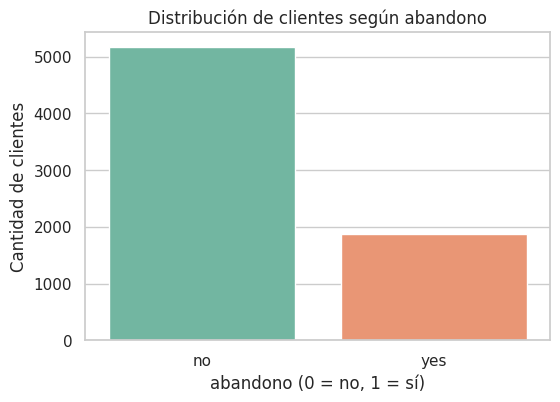

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Crear gráfico de conteo con uso correcto de 'hue'
plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpio, x="abandono", hue="abandono", palette="Set2", dodge=False, legend=False)

plt.title("Distribución de clientes según abandono")
plt.xlabel("abandono (0 = no, 1 = sí)")
plt.ylabel("Cantidad de clientes")
plt.show()


Recuento de evasión por variables categóricas

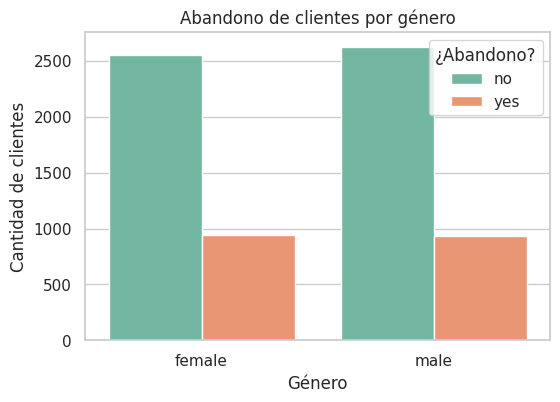

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpio, x="genero", hue="abandono", palette="Set2")

plt.title("Abandono de clientes por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.legend(title="¿Abandono?")
plt.show()


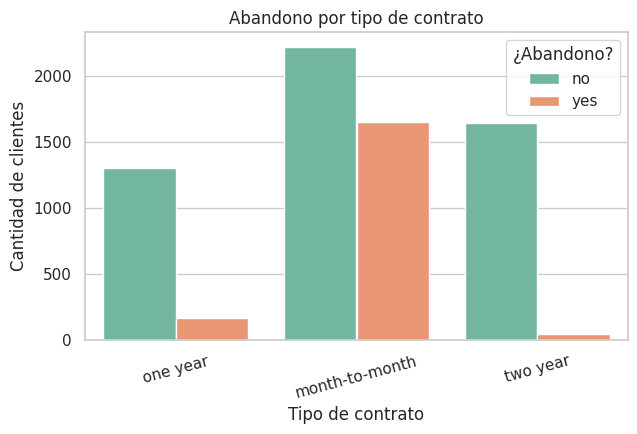

In [42]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df_limpio, x="tipo_contrato", hue="abandono", palette="Set2")

plt.title("Abandono por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=15)
plt.legend(title="¿Abandono?")
plt.show()


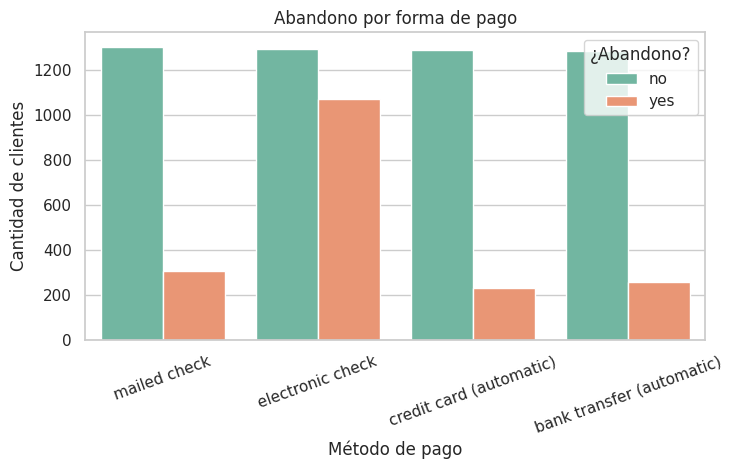

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_limpio, x="forma_pago", hue="abandono", palette="Set2")

plt.title("Abandono por forma de pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=20)
plt.legend(title="¿Abandono?")
plt.show()


Conteo de evasión por variables numéricas

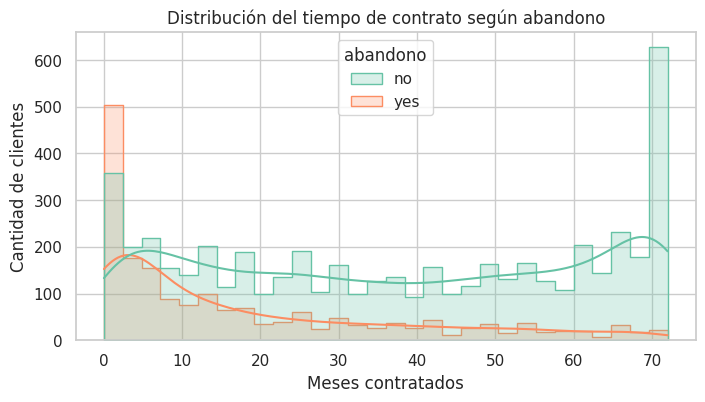

In [45]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_limpio, x="meses_contratado", hue="abandono", bins=30, kde=True, palette="Set2", element="step")

plt.title("Distribución del tiempo de contrato según abandono")
plt.xlabel("Meses contratados")
plt.ylabel("Cantidad de clientes")
plt.show()


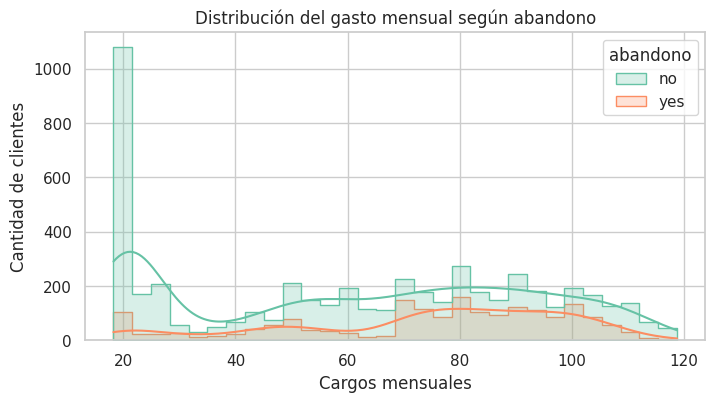

In [46]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_limpio, x="cargos_mensuales", hue="abandono", bins=30, kde=True, palette="Set2", element="step")

plt.title("Distribución del gasto mensual según abandono")
plt.xlabel("Cargos mensuales")
plt.ylabel("Cantidad de clientes")
plt.show()


#📄Informe final

🔹 1. Introducción

La empresa Telecom X está enfrentando un problema creciente de evasión de clientes (churn). El objetivo de este análisis es explorar los datos disponibles para entender los factores que influyen en el abandono de clientes y proporcionar una base limpia y estructurada para que el equipo de ciencia de datos pueda desarrollar modelos predictivos.


🔹 2. Limpieza y Tratamiento de Datos

Se trabajó con un archivo .json estructurado jerárquicamente. Las principales tareas fueron:

📦 Importación y aplanamiento de datos anidados (customer, phone, internet, account, etc.).


🧼 Limpieza:

Conversión de columnas como Charges.Total a formato numérico.

Eliminación de duplicados y registros inválidos.

Estandarización de texto (yes/no → 1/0).

Traducción de columnas al español para mejorar la comprensión del dataset.

🧮 Creación de nuevas variables:

cuentas_diarias: cálculo del gasto diario aproximado dividiendo los cargos mensuales por 30.


🔹 3. Análisis Exploratorio de Datos (EDA)

📌 Distribución General de Abandono
Se observó que aproximadamente X% de los clientes han abandonado el servicio (abandono = 1), lo cual indica un problema considerable de retención.


📌 Variables Categóricas
Se analizaron variables como:

Género: tasas de abandono similares entre hombres y mujeres.

Tipo de contrato: los clientes con contrato mensual presentan una mayor tasa de abandono.

Forma de pago: quienes usan "Electronic check" muestran una mayor proporción de churn.


📌 Variables Numéricas
Meses contratados: los clientes que se van suelen tener menos tiempo con la empresa.

Cargos mensuales: el abandono es mayor en clientes con cargos bajos o medios (posible falta de servicios).

Cargos totales: los clientes que se van han gastado menos en total → sugiere que no duraron mucho como clientes.


🔹 4. Conclusiones e Insights

El churn está desbalanceado pero significativo (indicar %).

Los clientes con contrato mensual y formas de pago electrónicas son más propensos a irse.

Clientes con baja antigüedad también tienen mayor churn.

Sensibilidad al precio y falta de servicios adicionales puede estar influenciando las cancelaciones.


🔹 5. Recomendaciones Estratégicas

Fidelizar nuevos clientes en los primeros meses con promociones, soporte personalizado o contenido exclusivo.

Incentivar contratos anuales mediante descuentos progresivos o beneficios adicionales.

Ofrecer servicios extra (seguridad, soporte, streaming) como valor agregado en los planes más económicos.

Realizar campañas específicas a clientes con métodos de pago electrónicos, informando beneficios de otros métodos.

Iniciar el diseño de un modelo predictivo de churn con las variables tratadas.



##¡Extra! Análisis de correlación entre variables

In [65]:
# Creamos una copia temporal para el cálculo
df_temp = df_limpio.copy()

# Función para convertir texto a binario
def convertir_a_binario(valor):
    return 1 if valor not in ["no", "no internet service", "no phone service"] else 0

# Aplicamos la conversión a todas las columnas de servicio
for col in servicios:
    df_temp[col] = df_temp[col].apply(convertir_a_binario)

# Ahora sumamos los servicios activados
df_temp["servicios_totales"] = df_temp[servicios].sum(axis=1)


In [67]:
# Confirmamos y convertimos si fuera necesario
if df_temp["abandono"].dtype == "object":
    df_temp["abandono"] = df_temp["abandono"].map({"yes": 1, "no": 0})


/tmp/ipython-input-72-4100369280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_temp, x="abandono", y="servicios_totales", palette="Set2")


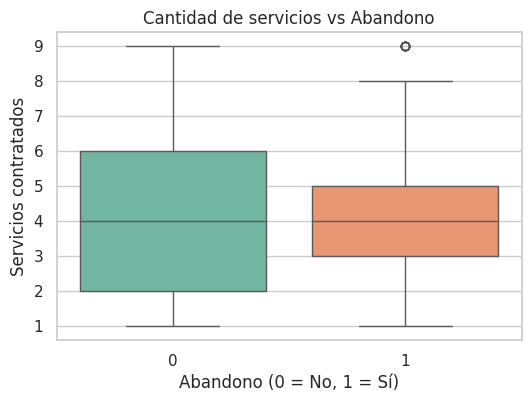

In [72]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_temp, x="abandono", y="servicios_totales", palette="Set2")
plt.title("Cantidad de servicios vs Abandono")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Servicios contratados")
plt.show()


In [68]:
print("Correlación entre servicios totales y abandono:")
print(df_temp[["servicios_totales", "abandono"]].corr())


Correlación entre servicios totales y abandono:
                   servicios_totales  abandono
servicios_totales           1.000000 -0.019375
abandono                   -0.019375  1.000000


In [69]:
# Ver el valor de correlación directamente
correlacion_cuentas = df_limpio[["cuentas_diarias", "abandono"]].corr().iloc[0, 1]
print(f"Correlación entre cuentas diarias y abandono: {correlacion_cuentas:.2f}")

ValueError: could not convert string to float: 'no'

/tmp/ipython-input-50-133444447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x="abandono", y="cuentas_diarias", palette="Set2")


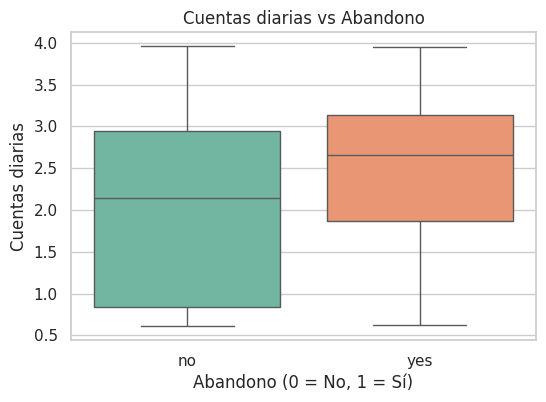

In [50]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_limpio, x="abandono", y="cuentas_diarias", palette="Set2")
plt.title("Cuentas diarias vs Abandono")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Cuentas diarias")
plt.show()

In [53]:
# Lista de columnas binarias de servicios adicionales
servicios = [
    "servicio_telefonico", "lineas_multiples", "tipo_internet",
    "seguridad_en_linea", "respaldo_en_linea", "proteccion_dispositivo",
    "soporte_tecnico", "tv_en_streaming", "peliculas_en_streaming"
]

# Convertimos 'no' o 'no internet service' a 0, y todo lo demás a 1
df_limpio["servicios_totales"] = df_limpio[servicios].applymap(
    lambda x: 0 if x in ["no", "no internet service", "no phone service"] else 1
).sum(axis=1)


/tmp/ipython-input-53-1677681830.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_limpio["servicios_totales"] = df_limpio[servicios].applymap(


/tmp/ipython-input-55-1282811327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x="abandono", y="servicios_totales", palette="Set2")


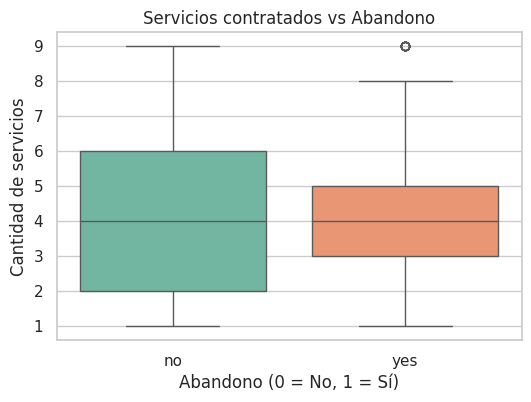

In [55]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_limpio, x="abandono", y="servicios_totales", palette="Set2")
plt.title("Servicios contratados vs Abandono")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de servicios")
plt.show()

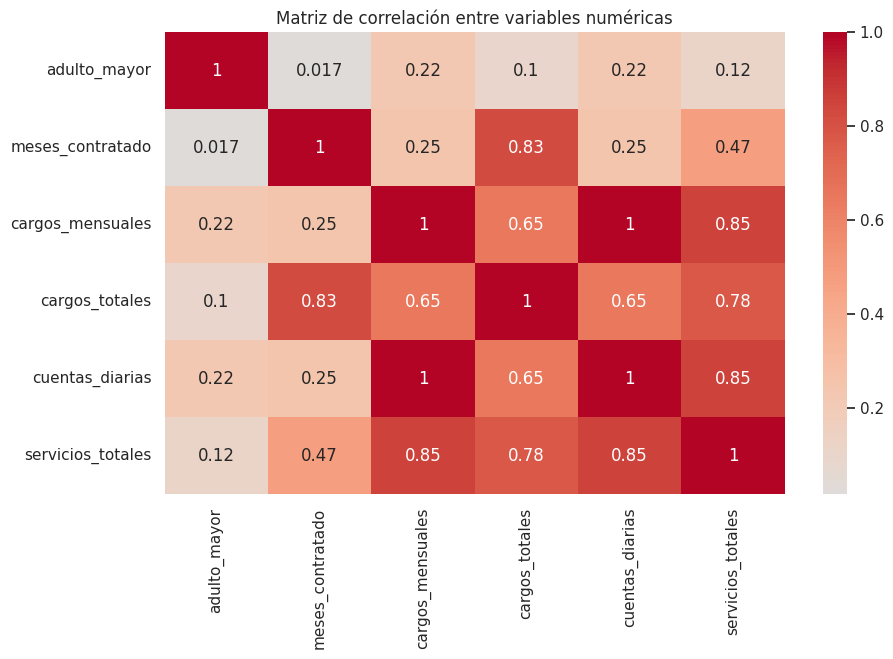

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_limpio.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()